In [2]:
using Distributions, Plots

# MME와 MLE

데이터로부터 모수 혹은 모수의 함수를 추측하는 일을 추정이라고 한다. 교과서에서 가장 처음으로 배우는 것은 적률추정(MME)이다. 적률추정량은 구하기가 쉽고^[거의 암산가능] 일치성을 가진다는 장점이 있는 반면 추정량이 유일하지 않다는 단점이 존재한다. 

보통 통계학과에서는 적률추정량보다 최대가능도 추정량(MLE)을 더 선호하게 된다. MLE는 일반적으로 MME보다 구하기 어렵다. 그래서 MLE를 구하는 여러가지 연습문제를 풀 필요성이 있다. 

# $\hat{\theta}^{MLE}$의 일치성 

MME는 일치성을 가졌는데, MLE는 어떠할까? 일반적으로 MLE 역시 일치성을 가짐을 보일 수 있다. 이걸 증명하는게 좀 까다로운데 증명을 생략하고 직관만 얻어보자. 먼저 $X_1,\dots,X_n$가 모수가 $\theta_0$인 어떠한 분포의 ***iid*** random sample이라면 $X_1,\dots,X_n$을 바탕으로 MLE를 아래와 같이 추정할 수 있다. 

$$\hat{\theta}^{MLE}=\underset{\theta \in \Omega}{\operatorname{argmax}} l(\theta)=\underset{\theta \in \Omega}{\operatorname{argmax}} \sum_{i=1}^{n}\log f(X_i;\theta)$$

여기에서 $l(\theta)$는 $\theta$에 대한 로그가능도 함수라고 한다. 그런데 $l(\theta)$를 최대화하는 일은 $\frac{1}{n}l(\theta)$를 최대화하는 일과 같으므로 $\hat{\theta}^{MLE}$는 아래와 같이 쓸 수 있다. 

$$\hat{\theta}^{MLE}=\underset{\theta \in \Omega}{\operatorname{argmax}}\frac{1}{n}l(\theta)=\underset{\theta \in \Omega}{\operatorname{argmax}}\frac{1}{n}\sum_{i=1}^{n}\log f(X_i; \theta)$$

이제 $\log f(X_i;\theta)$자체를 하나의 확률변수 $Y_i$라고 생각하면 $\frac{1}{n}\sum_{i=1}^{n}\log f(X_i;\theta) = \frac{1}{n}\sum_{i=1}^{n} Y_i$의 꼴이므로 WLLN을 쓸 수 있다. 즉 아래를 보일 수 있다. 

$$\frac{1}{n}\sum_{i=1}^{n}Y_i  \overset{P_{\theta_0}}{\to} \mathbb{E}(Y_1)$$

왠지 위의 식이 성립하니까 아래도 성립할 것 같다. 

$$\hat{\theta}^{MLE}=\underset{\theta \in \Omega}{\operatorname{argmax}}\frac{1}{n}\sum_{i=1}^{n}Y_i \overset{P_{\theta_0}}{\longrightarrow}\underset{\theta \in \Omega}{\operatorname{argmax}}\mathbb{E}(Y_1)$$

마치 $\text{argmax}$를 하나의 함수 $g$로 생각하면 $\bar{Y} \overset{P_{\theta_0}}{\to} E(Y_1)$ 일때 $g\big(\bar{Y}\big) \overset{P_{\theta_0}}{\to} g\big(E(Y_1)\big)$ 이 성립한다는 논리이다. 당연히 이러한 논리는 항상 성립하는 것이 아니고 "균등확률수렴성"이라는 강한 조건이 필요하다. 균등수렴성에 대한 자세한 내용은 생략하고 일단 

$$\hat{\theta}^{MLE} \overset{P_{\theta_0}}{\longrightarrow}\underset{\theta \in \Omega}{\operatorname{argmax}}\mathbb{E}(Y_1)$$

와 같은 식이 성립한다고만 알고 있자.^[균등확률수렴성은 로그가능도함수가 strictly convex일 경우 성립한다는 것이 알려져 있음] 우리는 MLE의 일치성을 조사하고 싶으므로 결국 아래를 증명하면 된다. 

$$\underset{\theta \in \Omega}{\operatorname{argmax}}\mathbb{E}(Y_1) = \underset{\theta \in \Omega}{\operatorname{argmax}}\mathbb{E}\big[\log f(X_1,\theta)\big] = \theta_{0}$$

결국 $\underset{\theta \in \Omega}{\operatorname{argmax}}\mathbb{E}\big[\log f(X_1,\theta)\big] = \theta_0$임을 증명하면 되는데 이것은 (1) pdf가 모수 $\theta$에 대하여 identifiable이고^[<https://en.wikipedia.org/wiki/Identifiability>] (2) pdf의 support가 $\theta$에 depend하지 않는 경우 성립한다고 알려져 있다. 

> 사실 이러한 조건은 당연한게 identifiable이 아니라면 제대로된 pdf가 아니라는 의미이겠고 pdf의 support가 $\theta$에 depend 한다면 $U[\theta-1,\theta+1]$과 같은 분포처럼 $\theta$의 MLE가 유일하지 않을 수도 있다는 의미이므로 이러한 두 조건은 합리적으로 보임 

# $\hat{\theta}^{MLE}$의 점근분포 

$\frac{1}{n}\dot{l}(\hat{\theta})$의 값을 테일러 정리에 의한 일차근사로 추정하면 아래와 같다. 

$$\frac{1}{n}\dot{l}(\hat{\theta}) \approx \frac{1}{n}\dot{l}(\theta) + \frac{1}{n}\ddot{l}(\theta)(\hat{\theta}-\theta)$$

## MLE의 일치성에 대한 구체적인 논의

$X_1,\dots,X_{10} \overset{i.i.d.}{\sim} Ber(\theta)$ 이라고 하자. 

In [7]:
x = rand(Bernoulli(0.3),10)
x

10-element Vector{Bool}:
 0
 0
 1
 1
 1
 1
 0
 0
 0
 0

여기에서 $\theta$는 추정해야할 미지의 모수이지만 우리는 시뮬레이션의 편의상 $\theta$의 참값을 $\theta_0=\frac{1}{3}$로 알고 있다고 하자. MLE를 논의함에 있어 핵심적인 역할을 하는 것은 $Y_1=\log f(X_1;\theta)$이다. 아래는 $Y_1$에 대한 몇가지 코멘트이다. 

**(1)** $Y_1$은 $X_1$와 $\theta$의 함수이다. 

- 우선 $X_1$의 함수이므로 $Y_1$역시 확률변수이다. 따라서 $Y_1$에 대하여 평균등을 취할 수 있으며 LLN을 쓸 수 있다. 
- $Y_1$은 $\theta$에 대한 함수이므로 $\theta$에 대하여 미분할 수 있다. 

**(베르누이 예제)**

우리의 베르누이 예제에서 $Y_1$은 아래와 같이 계산된다. 

$$Y_1 = \log f(X_1;\theta)= X_1 \log \theta + (1-X_1)\log(1-\theta)$$


보는 것 처럼 $Y_1$은 $X_1$와 $\theta$의 함수임 

**(2)** $\mathbb{E}_{\theta_0}(Y_1)$은 $\theta$ 만의 함수이다. 적당한 조건^[identifiable & common support]이 만족된다면 $\mathbb{E}_{\theta_0}(Y_1)$은 $\theta_0$ 에서 최대화 된다. 

**(베르누이 예제)**

$\mathbb{E}_{\theta_0}(Y_1) = \mathbb{E}_{\theta_0}(X_1)\log\theta + (1-\mathbb{E}_{\theta_0}(X_1))\log(1-\theta) =  \frac{1}{3} \log\theta + (1-\frac{1}{3})\log(1-\theta)$

> 일반적인 상황에서는 참모수를 모르지만 우리는 시뮬레이션을 $\theta=1/3$에서 하였으므로 참모수 $\theta_0=\mathbb{E}_{\theta_0}(X_1)=\frac{1}{3}$을 알고 있다고 가정한다. 

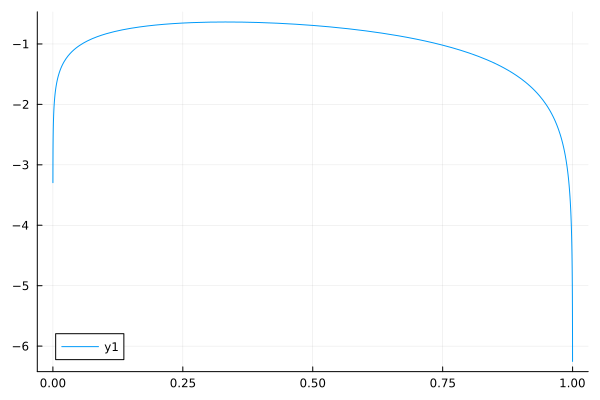

In [10]:
plot(θ -> (1/3)*log(θ) + (1-1/3)*log(1-θ)) 

보는것처럼 이 함수 $\mathbb{E}_{\theta_0}(Y_1)$은 $\theta=\theta_0=\frac{1}{3}$ 에서 최대값을 가진다. 

**(3)** $\frac{\partial}{\partial \theta}Y_1$ 역시 $X_1$와 $\theta$의 함수이다. 

- 따라서 $\frac{\partial}{\partial \theta}Y_1$ 역시 확률변수이고 $\frac{\partial}{\partial \theta}Y_1$에 대하여 평균등을 취할 수 있으며 LLN을 쓸 수 있다. 


**(베르누이 예제)**

$\frac{\partial}{\partial\theta}Y_1 = X_1\frac{1}{\theta} + (1-X_1)\frac{-1}{1-\theta}$

**(4)** $\mathbb{E}_{\theta}[\frac{\partial}{\partial \theta}Y_1]=0$ 이다.

**(베르누이 예제)**

$\mathbb{E}_{\theta}[\frac{\partial}{\partial\theta}Y_1] = \theta\frac{1}{\theta} + (1-\theta)\frac{-1}{1-\theta}=0$

**(5)** $\mathbb{V}_{\theta}[\frac{\partial}{\partial\theta}Y_1]=\mathbb{E}_{\theta}[-\frac{\partial^2}{\partial \theta^2}Y_1]=I(\theta)$

**(베르누이 예제)**

$\mathbb{V}_{\theta}\big[\frac{\partial}{\partial\theta}Y_1\big]=\mathbb{E}_{\theta}\big[(\frac{\partial}{\partial\theta}Y_1)^2\big]=\mathbb{E}_{\theta}\big[-\frac{\partial^2}{\partial\theta^2}Y_1\big]=\frac{1}{\theta(1-\theta)}$

- 두번째 등호는 $\mathbb{E}_{\theta}[\frac{\partial}{\partial\theta}Y_1]=0$을 이용하여 증명가능하다.
- 언뜻 보면 $\mathbb{V}_{\theta}\big[\frac{\partial}{\partial\theta}Y_1\big]$를 계산하는 것이 $\mathbb{E}_{\theta}\big[-\frac{\partial^2}{\partial\theta^2}Y_1\big]$를 계산하는것보다 훨씬 쉬워보인다. 그런데 $X_1$와 $1-X_1$이 독립이 아니라서 $\mathbb{V}(X+Y)=\mathbb{V}(X)+\mathbb{V}(V)+2\text{Cov}(X,Y)$와 같이 공분산 term을 계산해야 하므로 계산이 까다롭다. 

> 베르누이에 대한 피셔정보량은 <https://en.wikipedia.org/wiki/Fisher_information> 에서 확인할 수 있음 